In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 1. Introduction

#### Prerequisite knowledge
This walk through assumes that the reader has a basic understanding of:
- probability distribution functions
- basic differential/integral calculus concepts
- basic familiarity with statistical moments

### What is goodness of fit testing?

Goodness-of-fit testing is the exercise of trying to describe and compare how well a statistical models parametrize some observed phenomenon.

- The observed phenomenon usually comes in the form of raw data
- Parameterization essentially means selecting a well understood probability distribution function (PDF) to represent the data.

### Why do we do goodness of fit testing?

Using a well understood smooth PDF as an assumption/model to represent a real world phenomenon comes with many benefits.
- Provides the user with a clear set of underlying assumptions
- Unlocks powerful statements on probability of certain events occurring
- Provides user with a set of statistical metrics to compare the fit of different PDFs

### Working example: Insurance claim amounts

We can explore fitting a parametric model over some raw observed phenomenon through the use of an example dataset that shows the claim amounts of 96 lodged claims.

We can first read in the data and plot a histogram of the observations.

In [2]:
df = pd.read_csv('data/sample_claims.csv')
df.head()

,claims
0,24
1,26
2,73
3,84
4,102


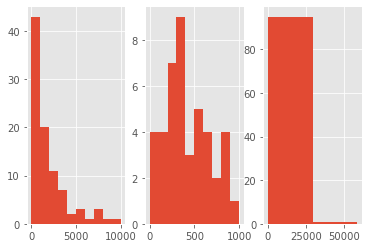

In [4]:
bins_1 = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 9999]
bins_2 = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]
bins_3 = 2

for idx, bin_range in enumerate([bins_1, bins_2, bins_3]):
    plt.subplot(1, 3, idx + 1)
    plt.hist(x=df, bins=bin_range)

Note that at this step we've already started to make some implicit assumptions about the distribution of the data through the selection of bins or bar widths.
We can see the differences in the shape of the histograms when using a bin size of 100 compared to 1000, and the case with just 2 bins.

One important property that all 3 results have in common is the **equal bin sizes**, which is always recommended (unless you really know what you're doing) as it reduces the risk of implying any bias in the models downstream, assuming that the numerical data has been scaled properly i.e 2 is 1 greater than 1 and 3 is 2 greater than 1. For this example we're dealing with $ amounts and this is the case.

The ultimate goal of a histogram is to provide the user with useful information on how the data is spread out and to that end, selection of bin sizes based on the domain characteristics are always preferred, for example:
- Binning exam scores based on the system's grade banding
- Binning insurance claim amounts based on company defined thresholds
- Binning ages based on the system's current rating structure

With that in mind, there are a few rules of thumb that modern day statistical and visualization packages tend to use for calculating an optimal bin size, and as a result number of bins:

| rule | formula | comments |
| ----------- | ----------- | ----------- |
| auto | max of sturges and fd estimators | default configuration for matplotlib and numpy |
| sturges | $ bin number = 1 + 3.322 log_{N} $ | R's default algorithm, assumes that data is inherently normal and symmetrical |
| freedman-diaconis | $ bin size = 2\dfrac{IQR(x)}{\sqrt[3] N} $ | designed to minimize differences between empirical and theoretical distributions detailed implementation [here](http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html) |
| square root | $bin number = \sqrt{n} $ | Excel's default algorithm, simple and fast |